In [1]:
import os
from IPython.display import Image, display
from IPython import display

In [2]:
!nvidia-smi

Thu May 16 17:06:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
HOME = os.getcwd()
HOME

'/content'

In [4]:
!pip install ultralytics==8.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.8/219.8 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0

In [5]:
import ultralytics

In [6]:
ultralytics.checks()

Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.8/78.2 GB disk)


In [7]:
!mkdir {HOME}/datasets

In [8]:
!pwd

/content


In [9]:
%cd {HOME}/datasets

/content/datasets


In [10]:
!pwd

/content/datasets


In [11]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="B23RU3MxCJVf0RabBD5c")
project = rf.workspace("ai-ehrr3").project("testing-pcqgi")
version = project.version(3)
dataset = version.download("yolov5")



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.9/74.9 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to testing-3 in yolov5pytorch:: 100%|██████████| 16294/16294 [00:02<00:00, 5776.12it/s]


In [12]:
%cd {HOME}

/content


In [13]:
%cd {dataset.location}

/content/datasets/testing-3


In [14]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data=/content/datasets/testing-3/data.yaml epochs=10

/content
100% 49.7M/49.7M [00:00<00:00, 275MB/s]

yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/testing-3/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.01, lrf=0.01, momentum=0.937,

In [15]:
!ls {HOME}//runs/detect/train

args.yaml					    R_curve.png		   val_batch0_pred.jpg
confusion_matrix.png				    results.csv		   val_batch1_labels.jpg
events.out.tfevents.1715879609.f236e02ca39e.3021.0  results.png		   val_batch1_pred.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_labels.jpg
P_curve.png					    train_batch1.jpg	   val_batch2_pred.jpg
PR_curve.png					    train_batch2.jpg	   weights
predictions.json				    val_batch0_labels.jpg


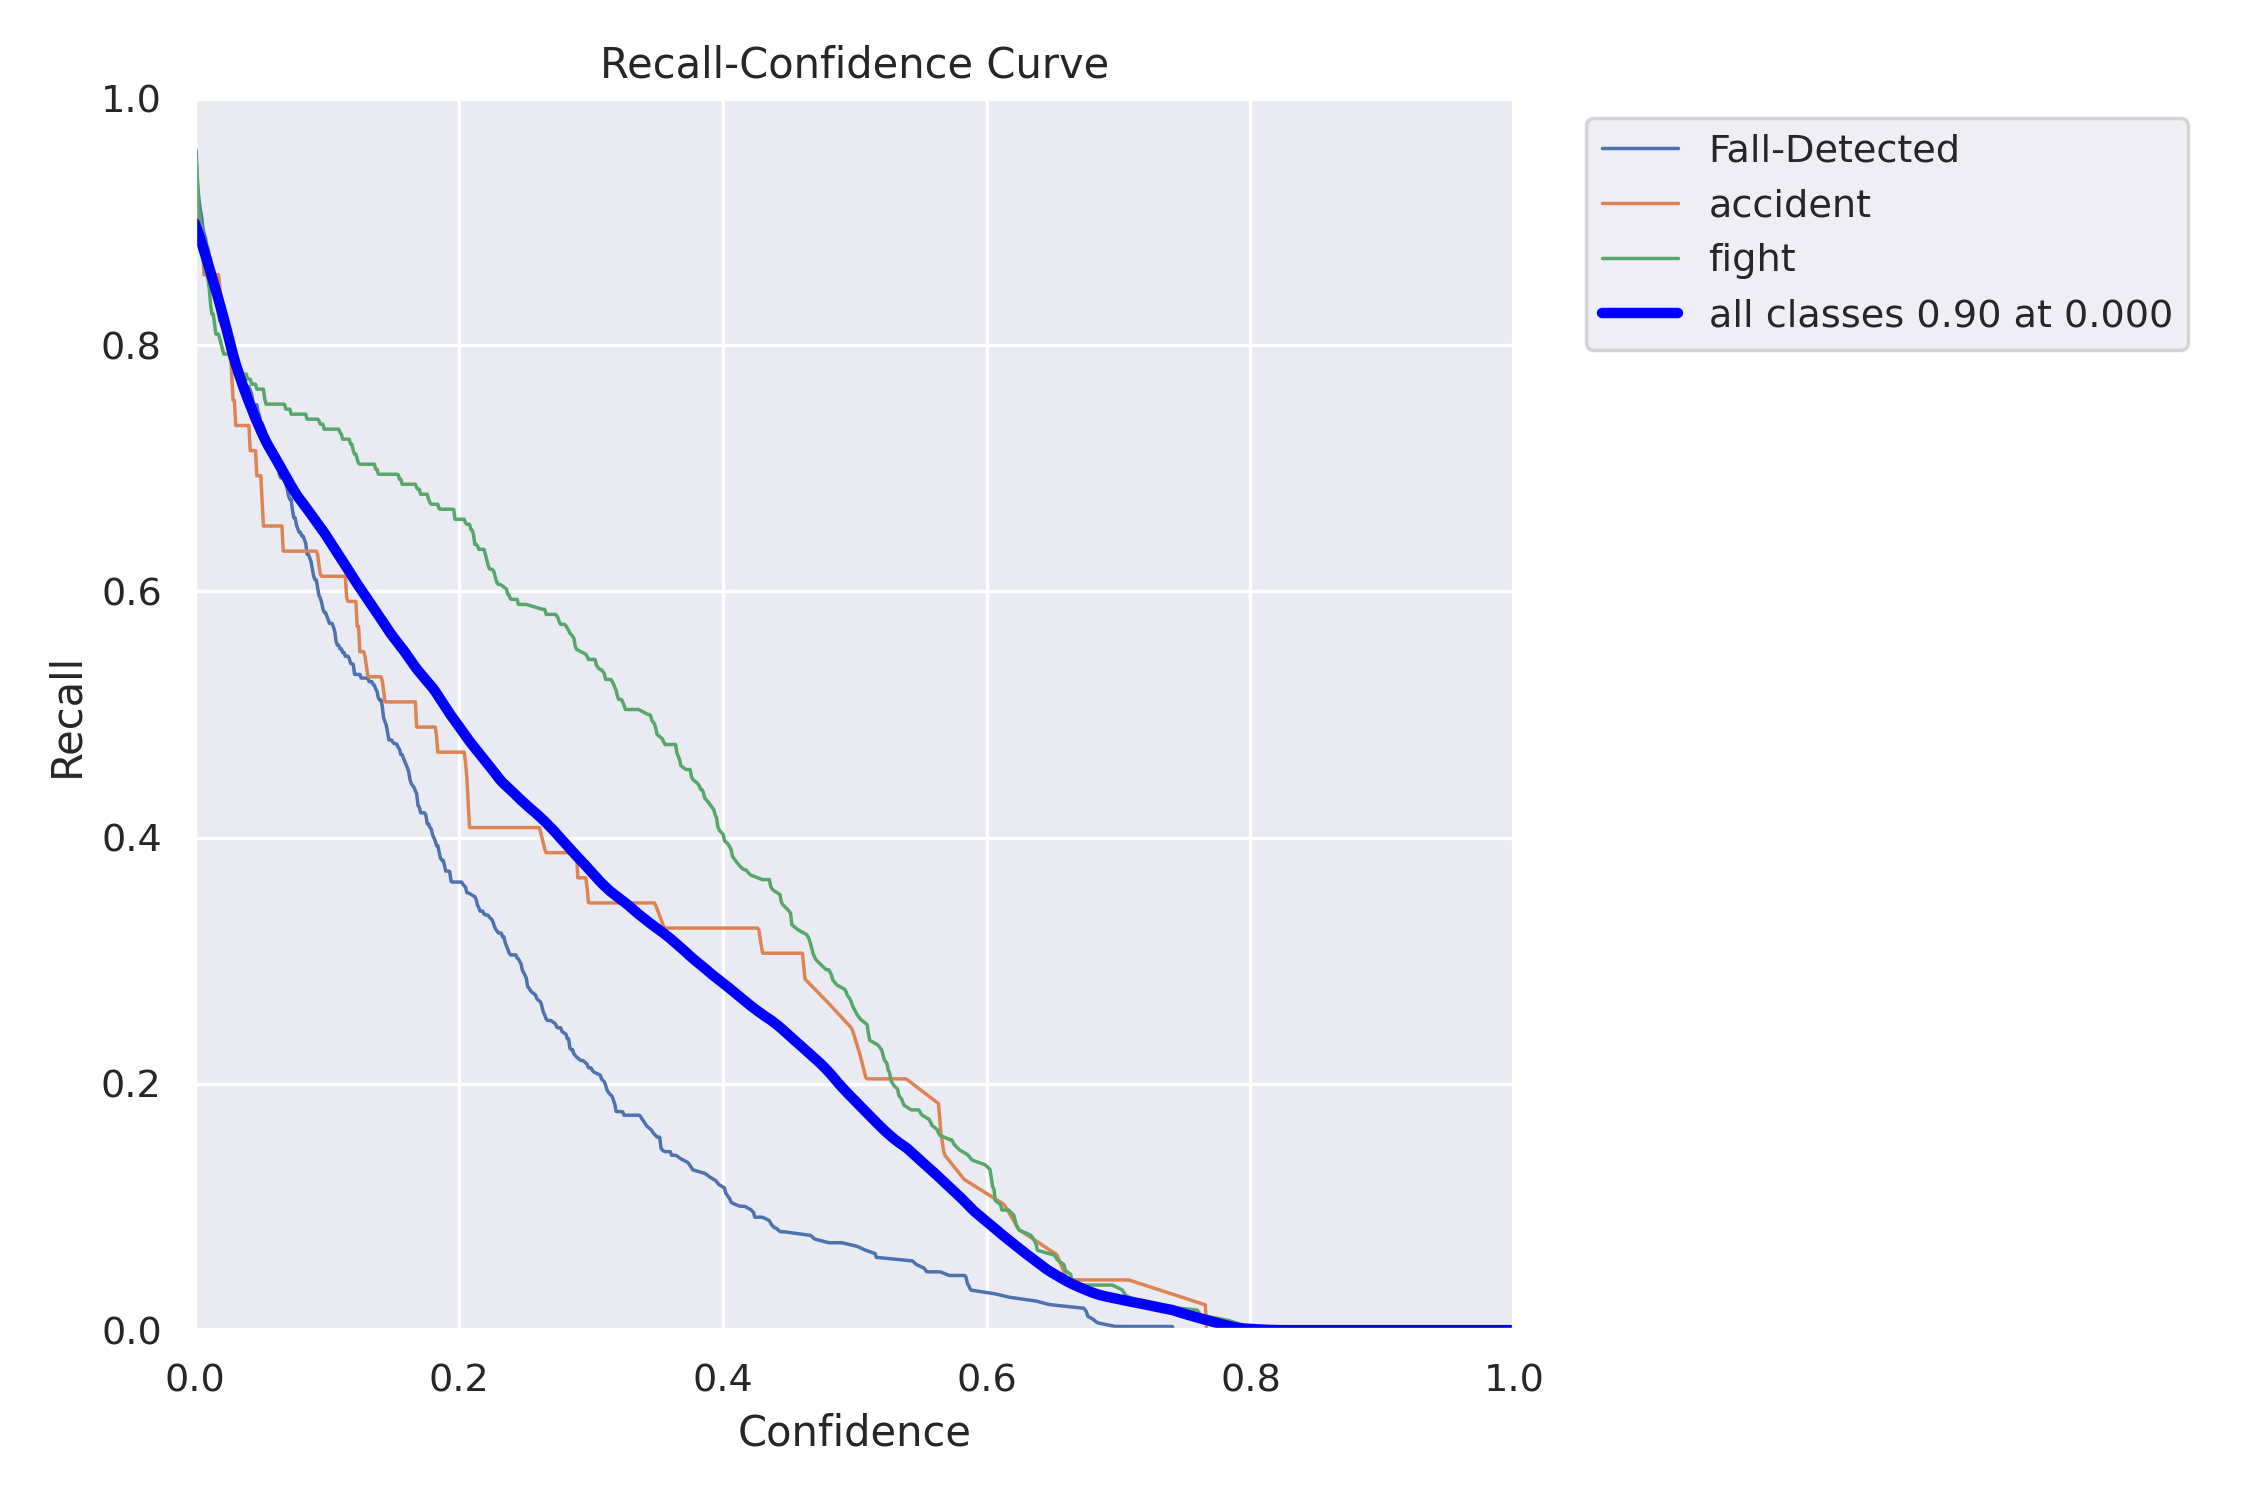

In [25]:
Image(filename=f'{HOME}/runs/detect/train/R_curve.png', width=900)

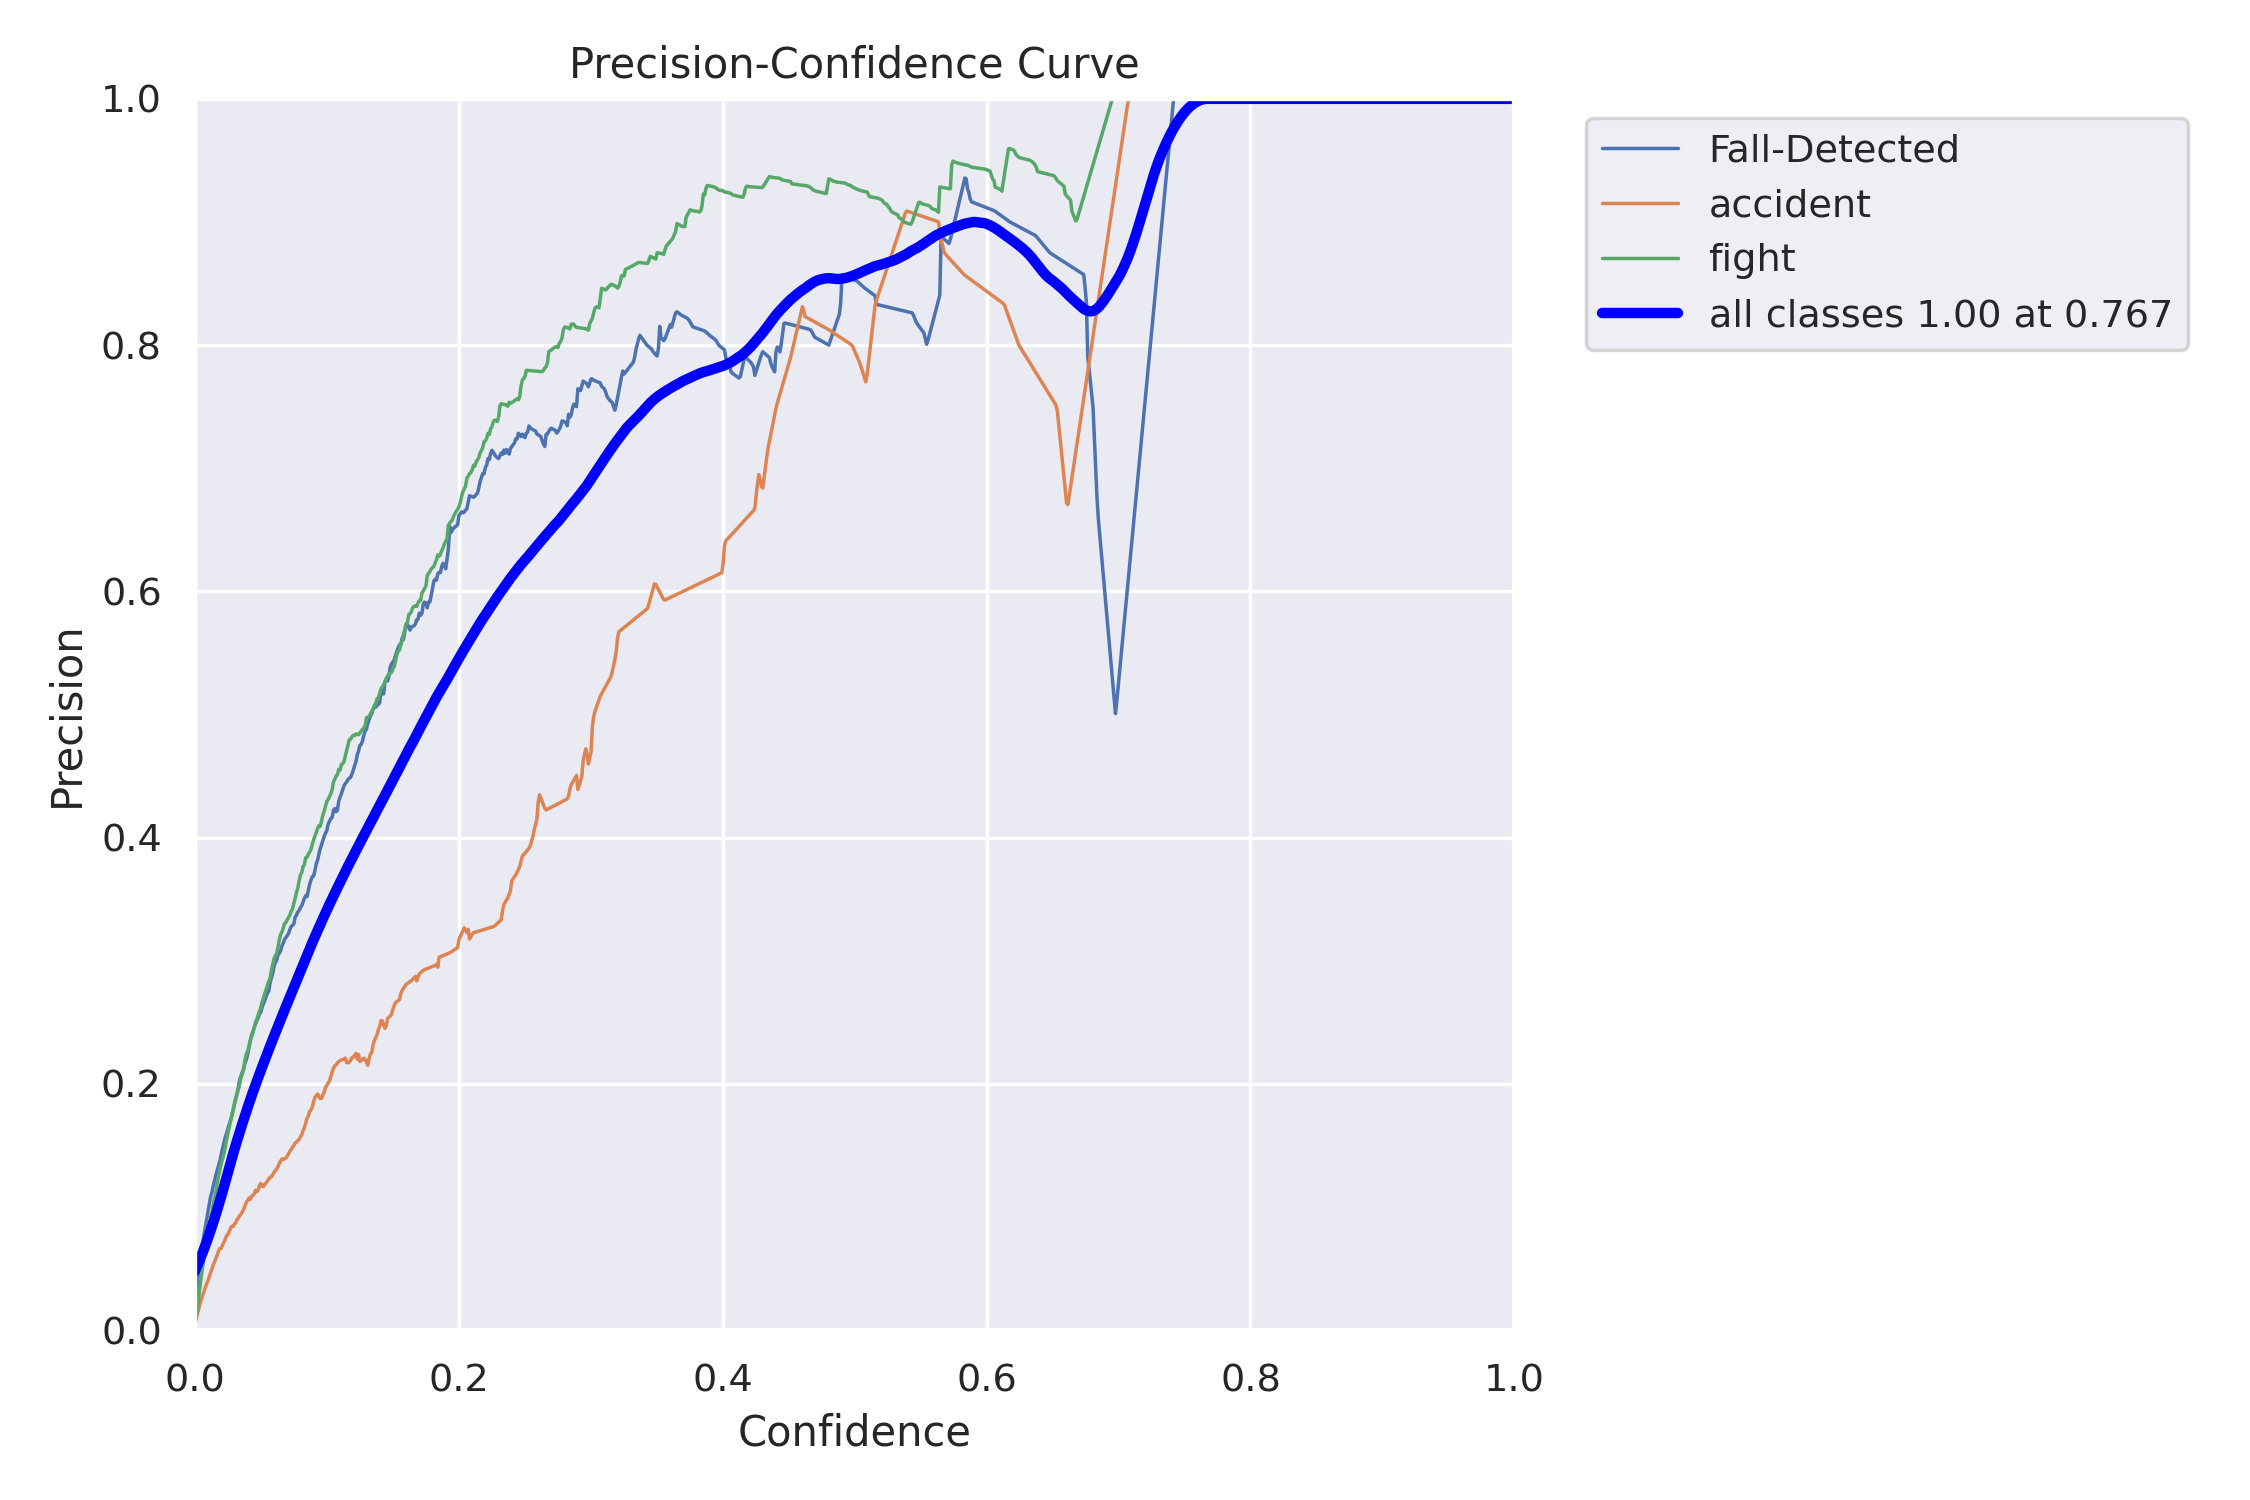

In [23]:
Image(filename=f'{HOME}/runs/detect/train/P_curve.png', width=900)

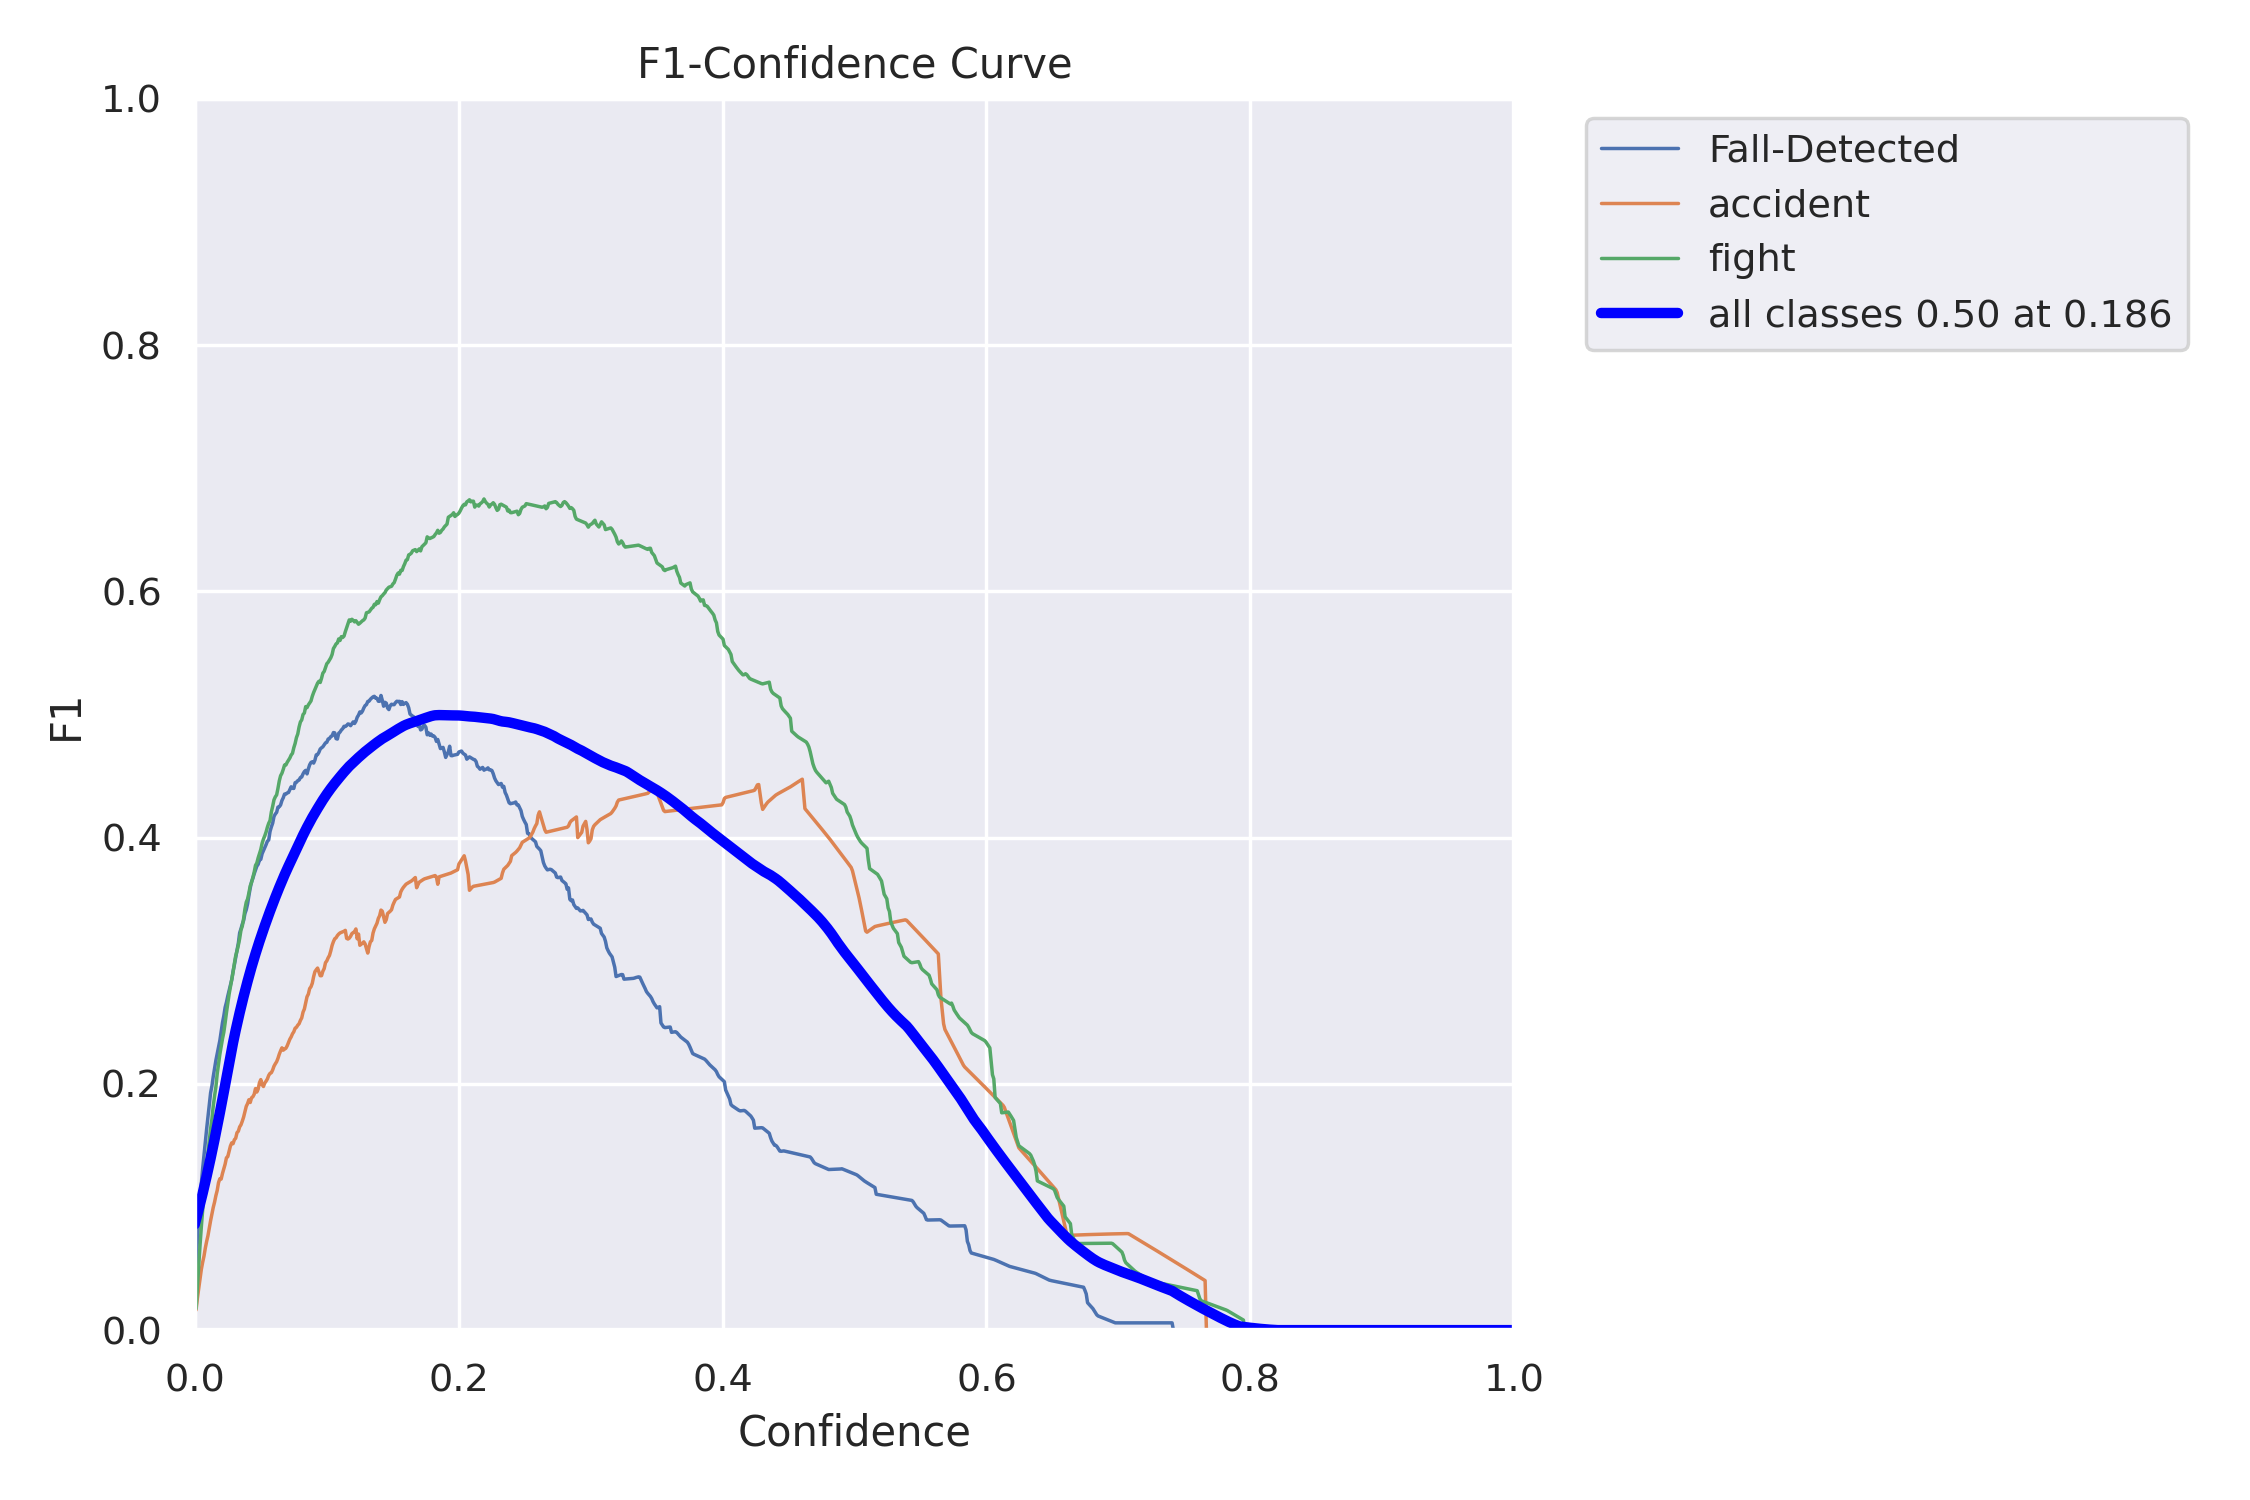

In [22]:
Image(filename=f'{HOME}/runs/detect/train/F1_curve.png', width=900)

/content


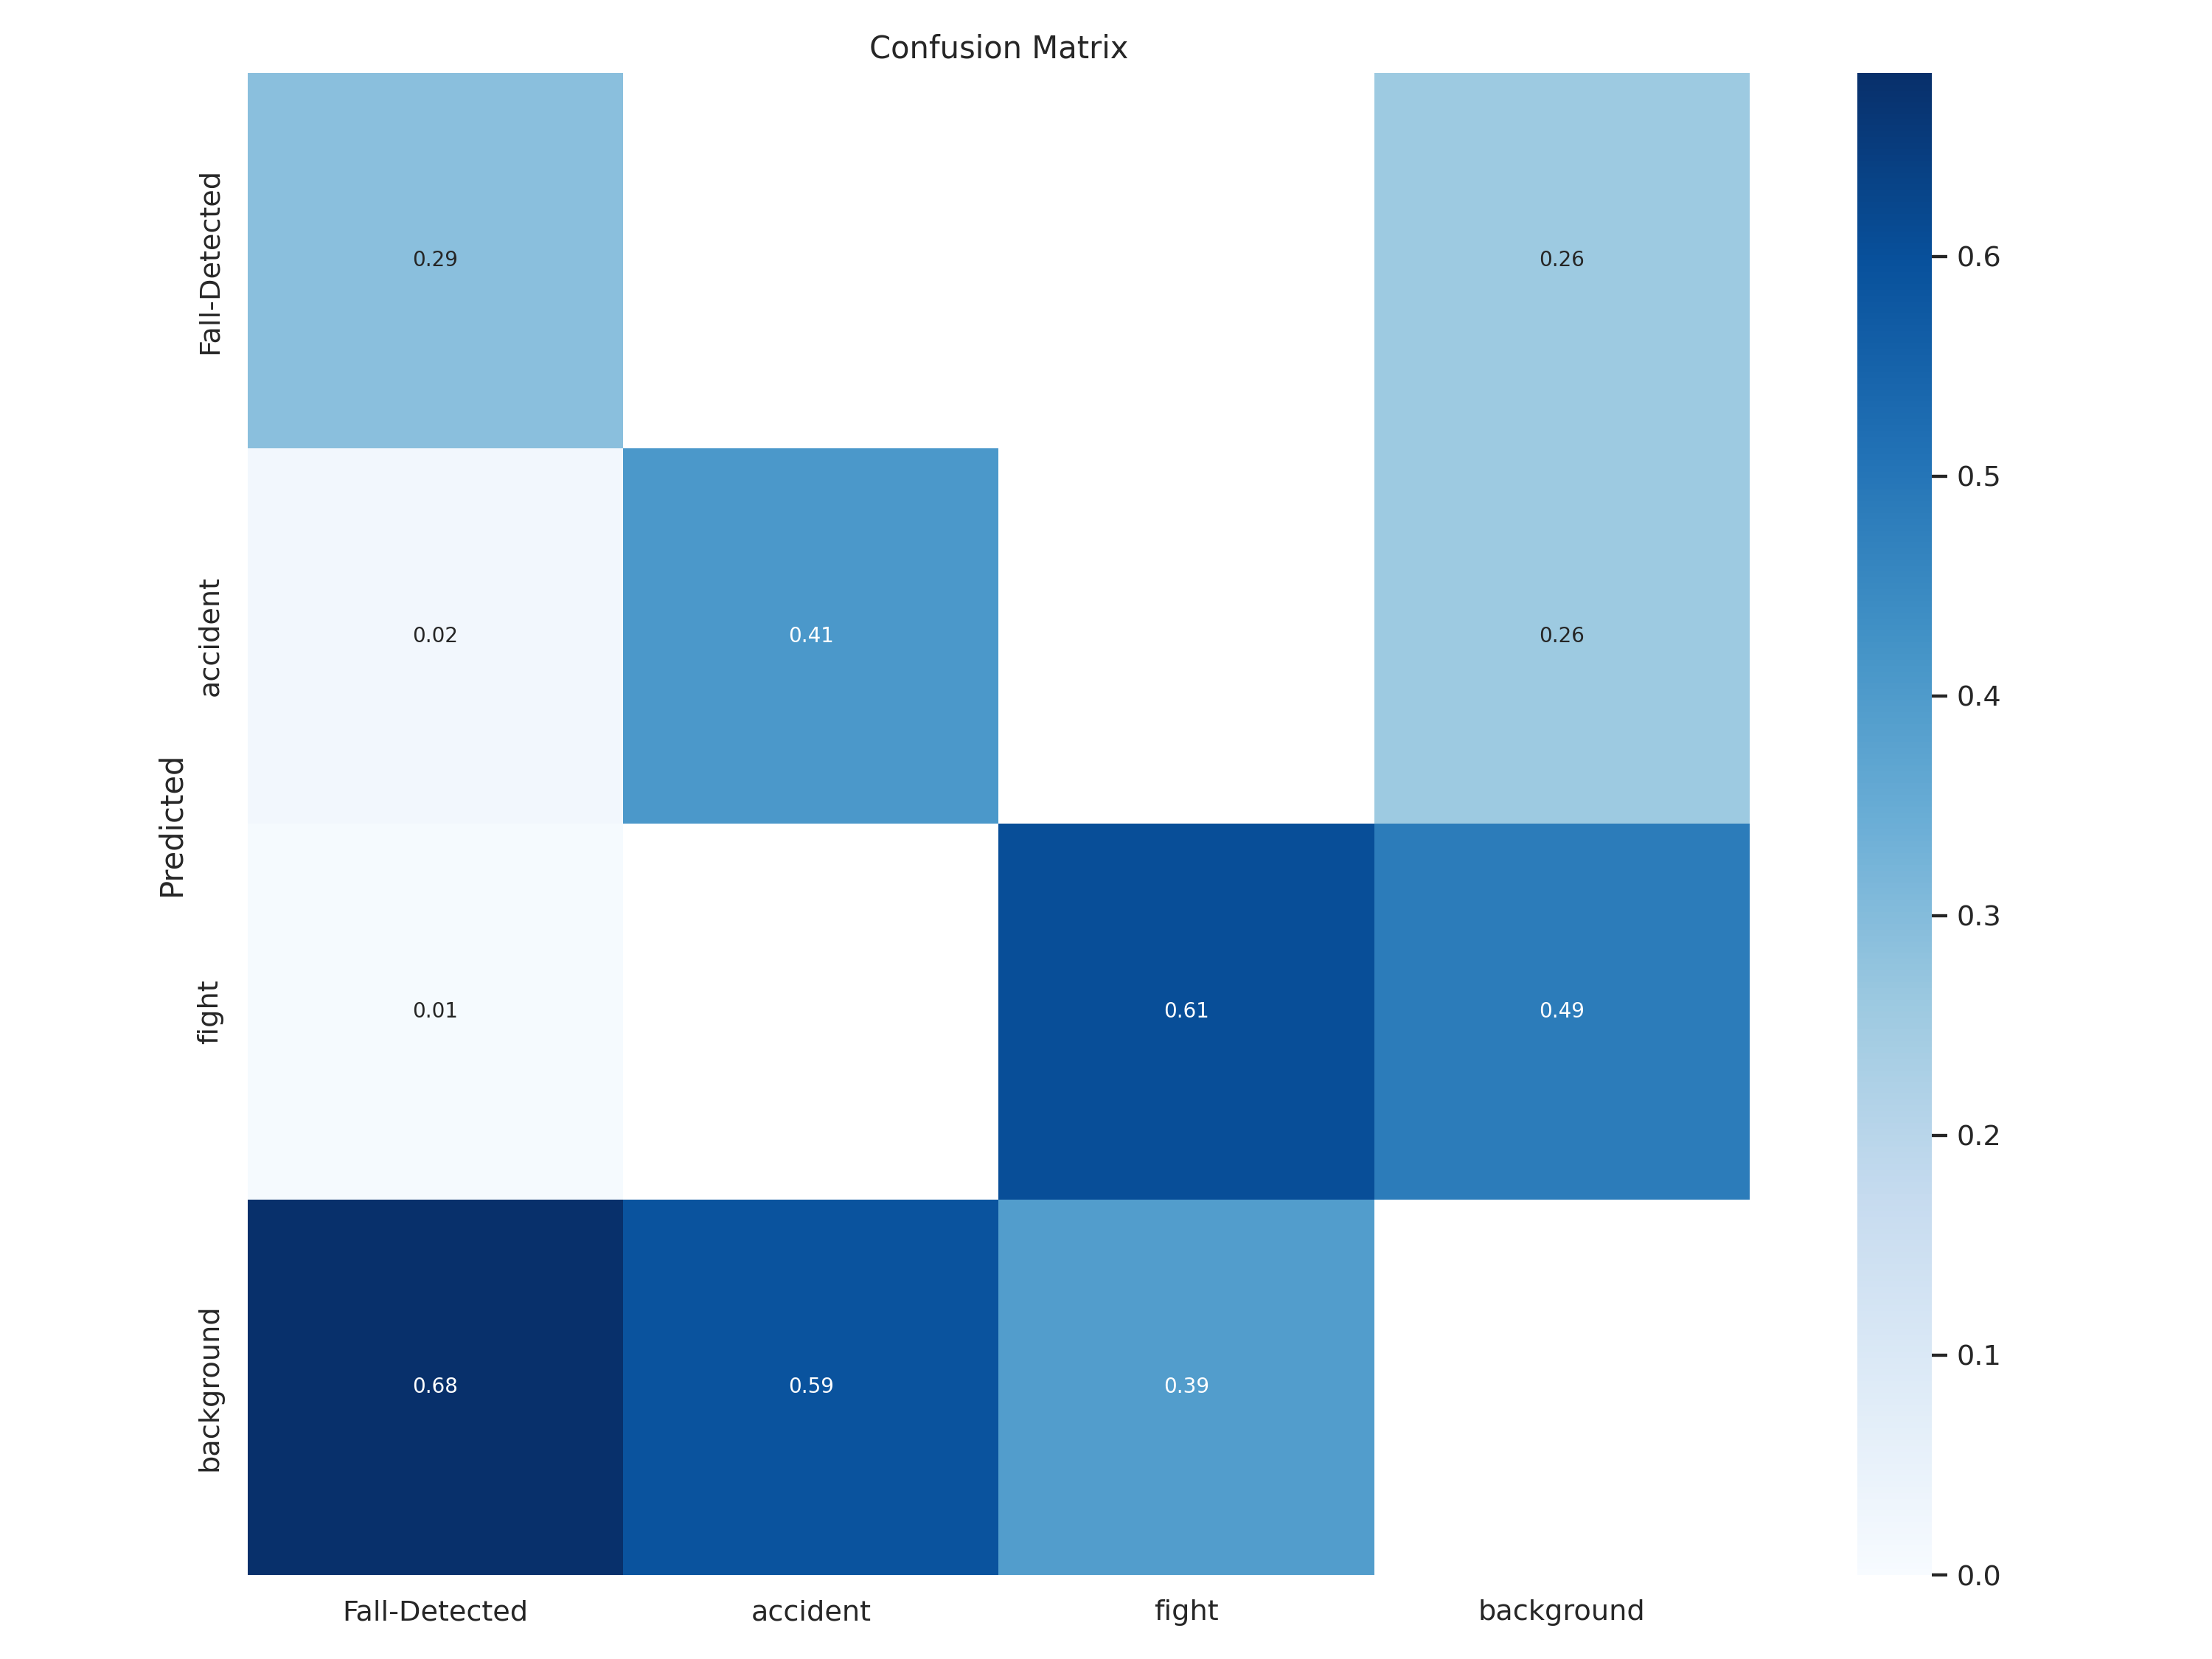

In [18]:
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=900)

/content


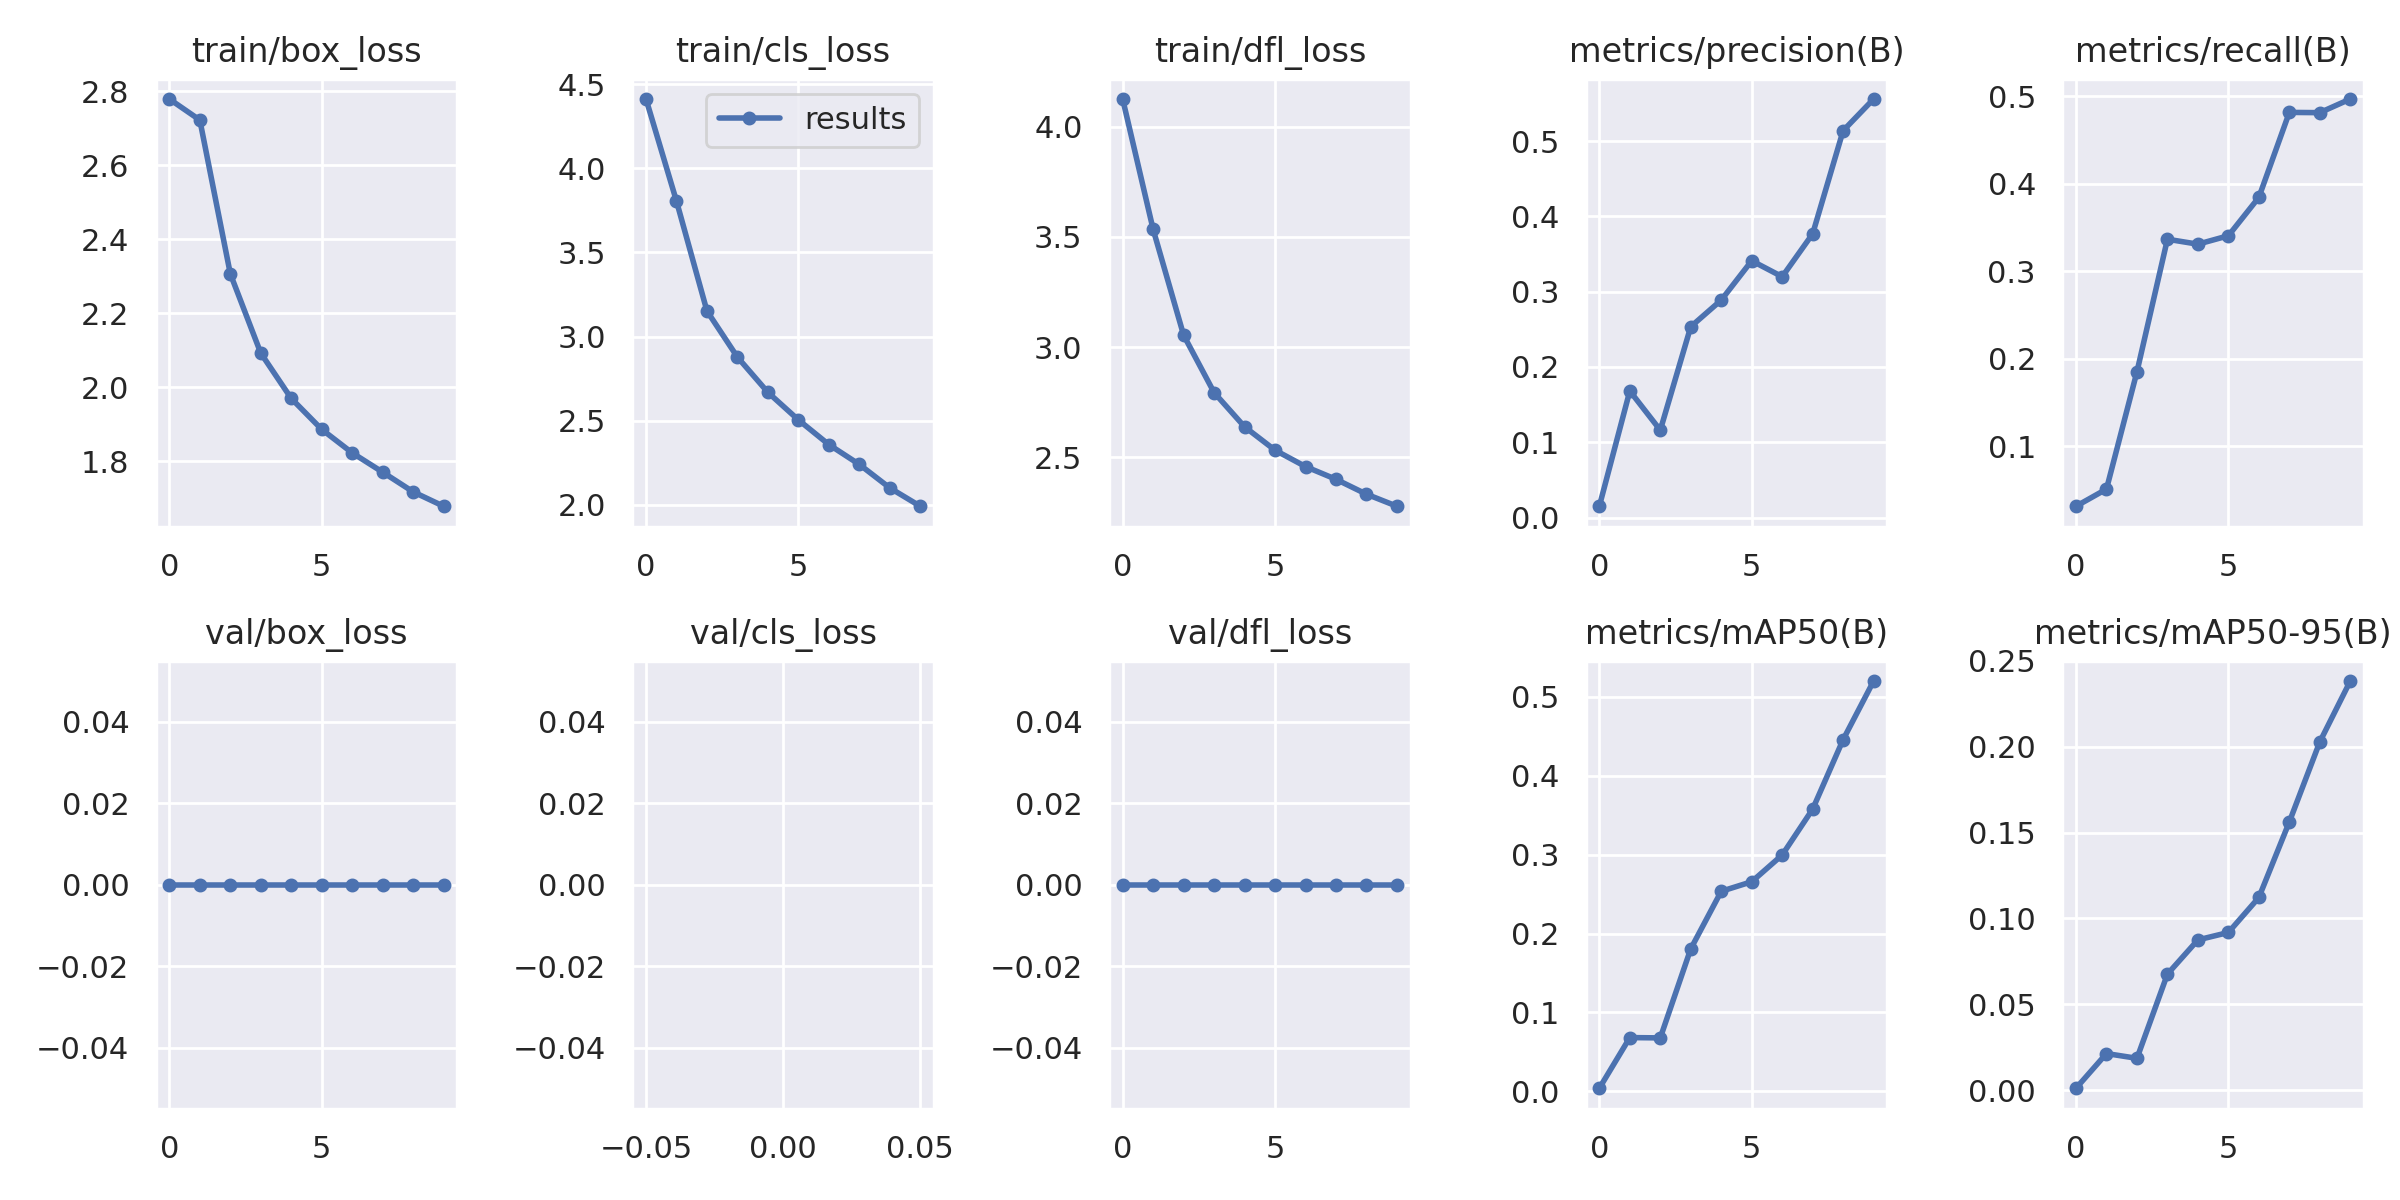

In [20]:
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


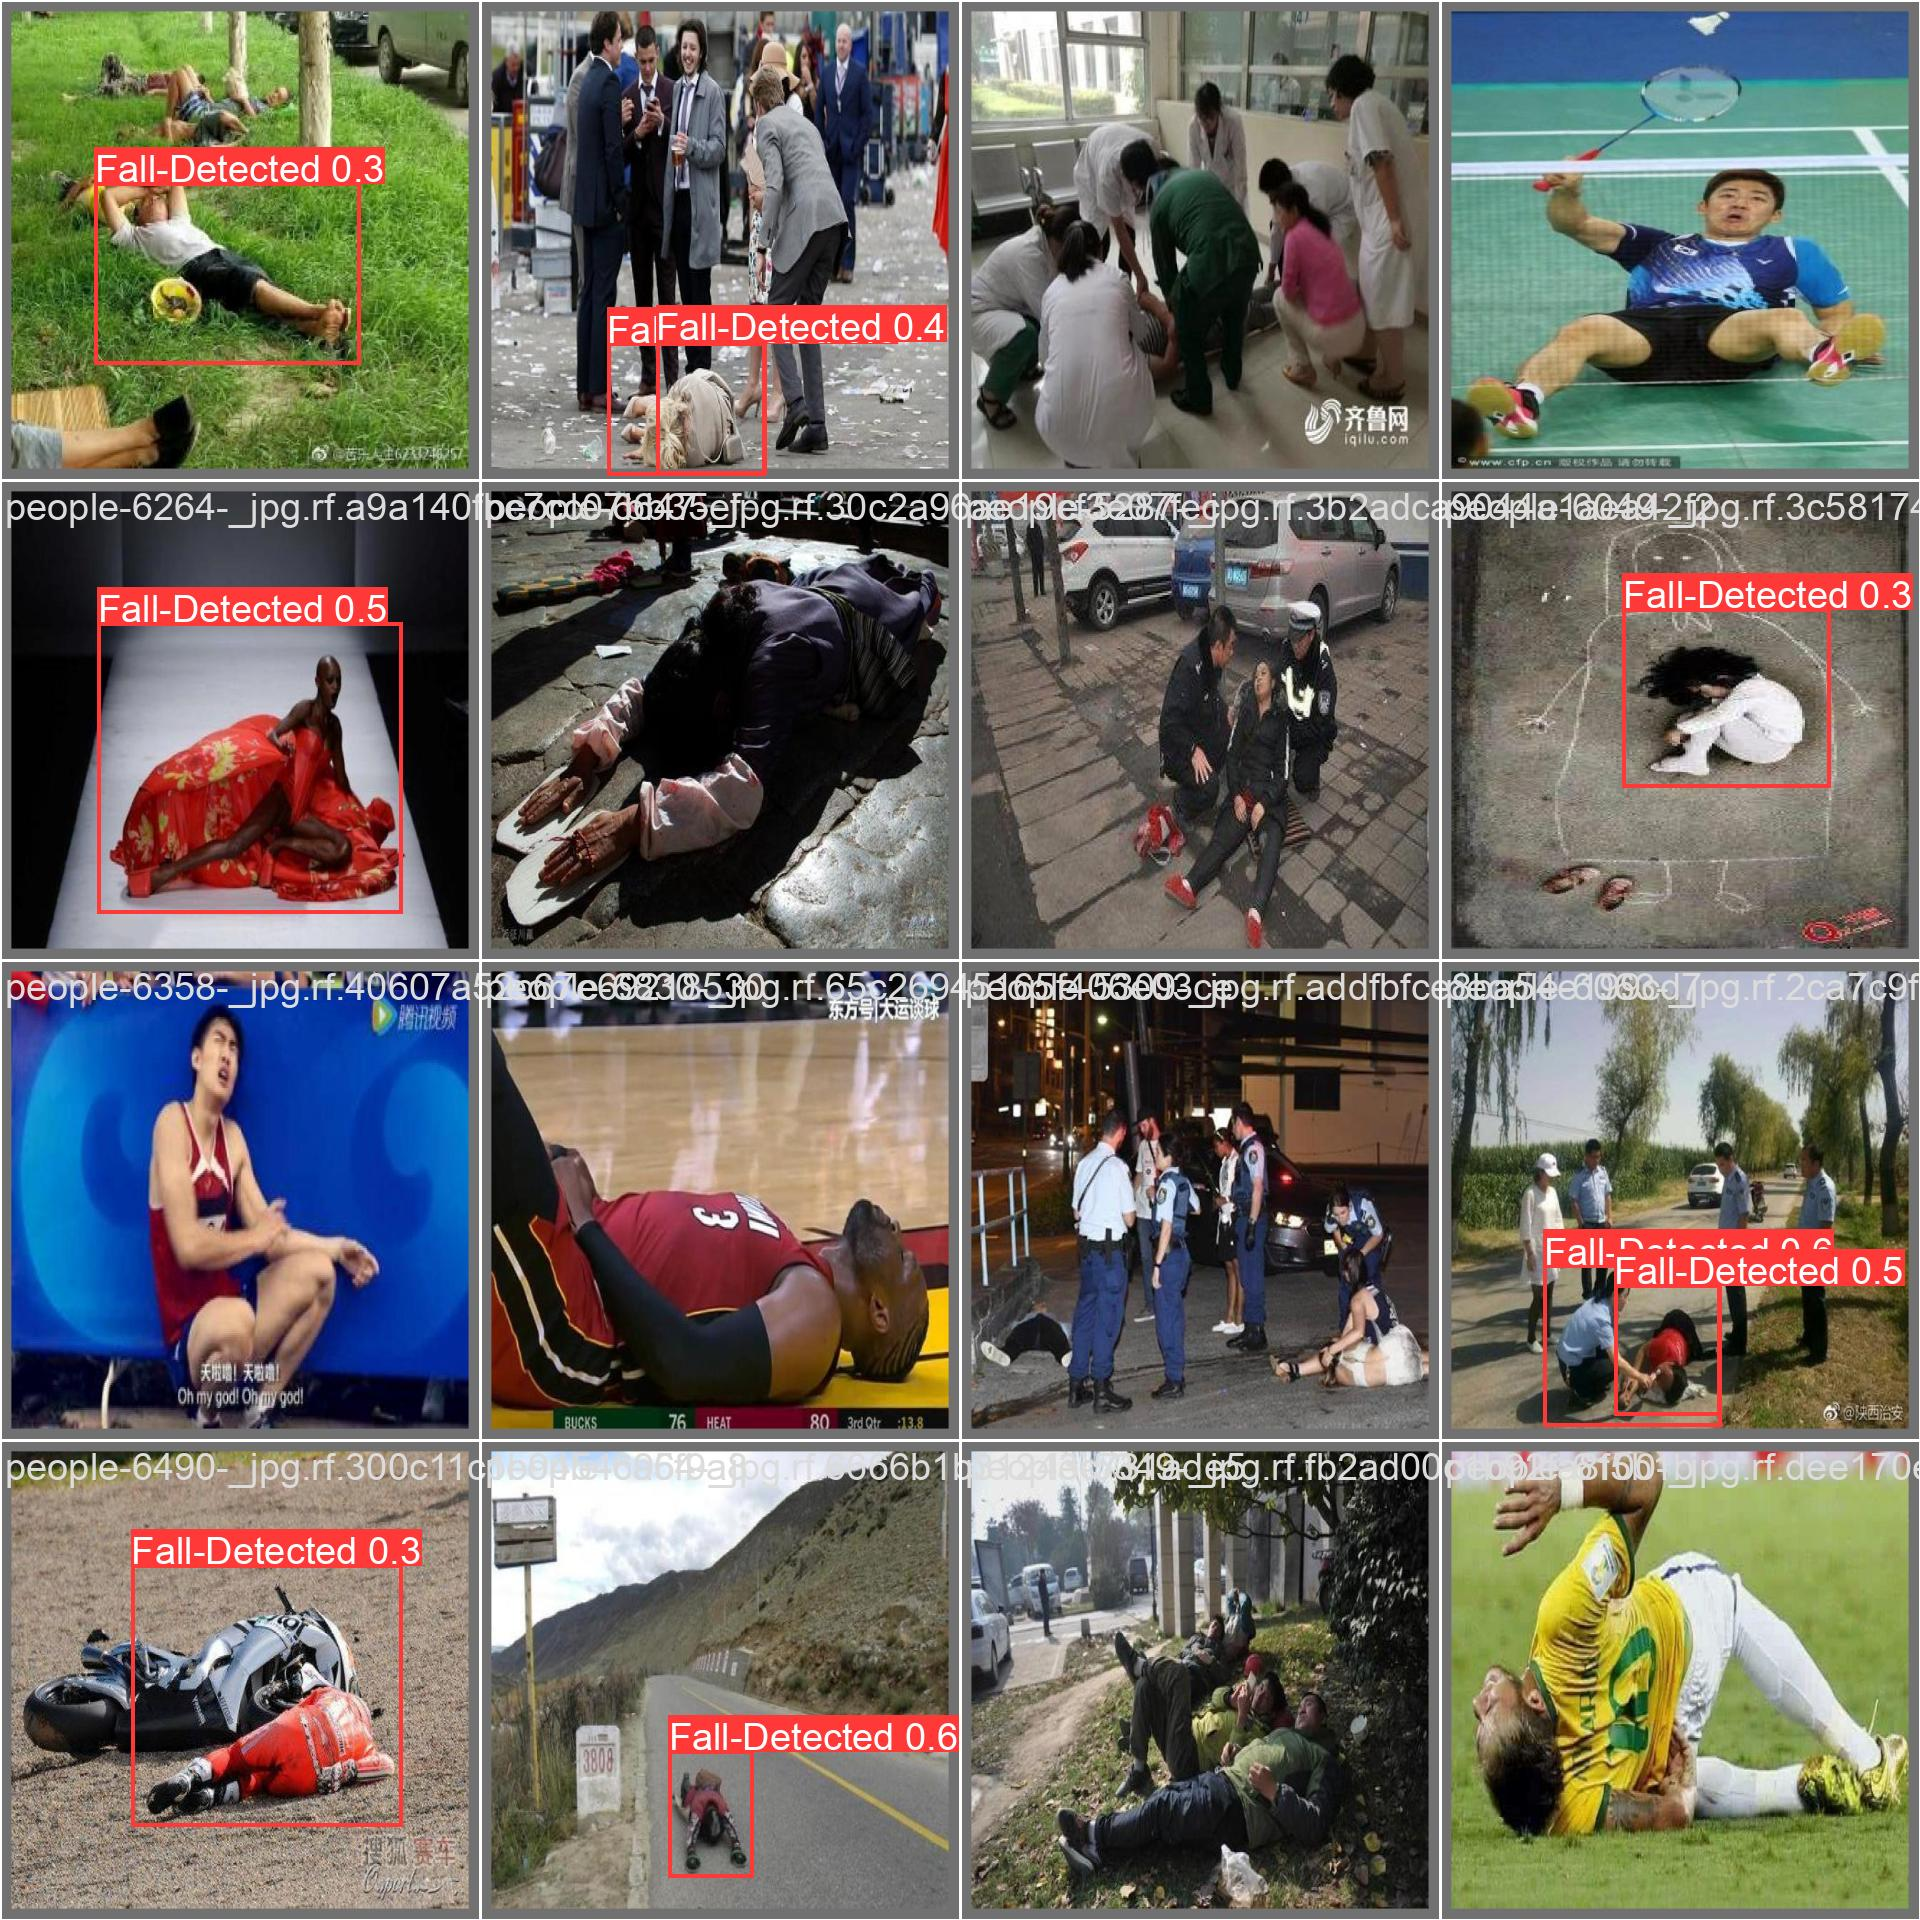

In [21]:
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [26]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=https://media.assettype.com/freepressjournal/2024-02/4f778534-5589-4c9c-8794-61407eae74eb/WhatsApp_Image_2024_02_17_at_12_37_26_PM.jpeg

/content
2024-05-16 18:13:08.455581: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-16 18:13:08.455638: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-16 18:13:08.457281: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-16 18:13:09.777422: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
100% 277k/277k [00:00<00:00, 14.5MB/s]
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 218 layers, 25841497 parameters, 0 gradients, 78.7 GFLOPs
image 1/1 /conte

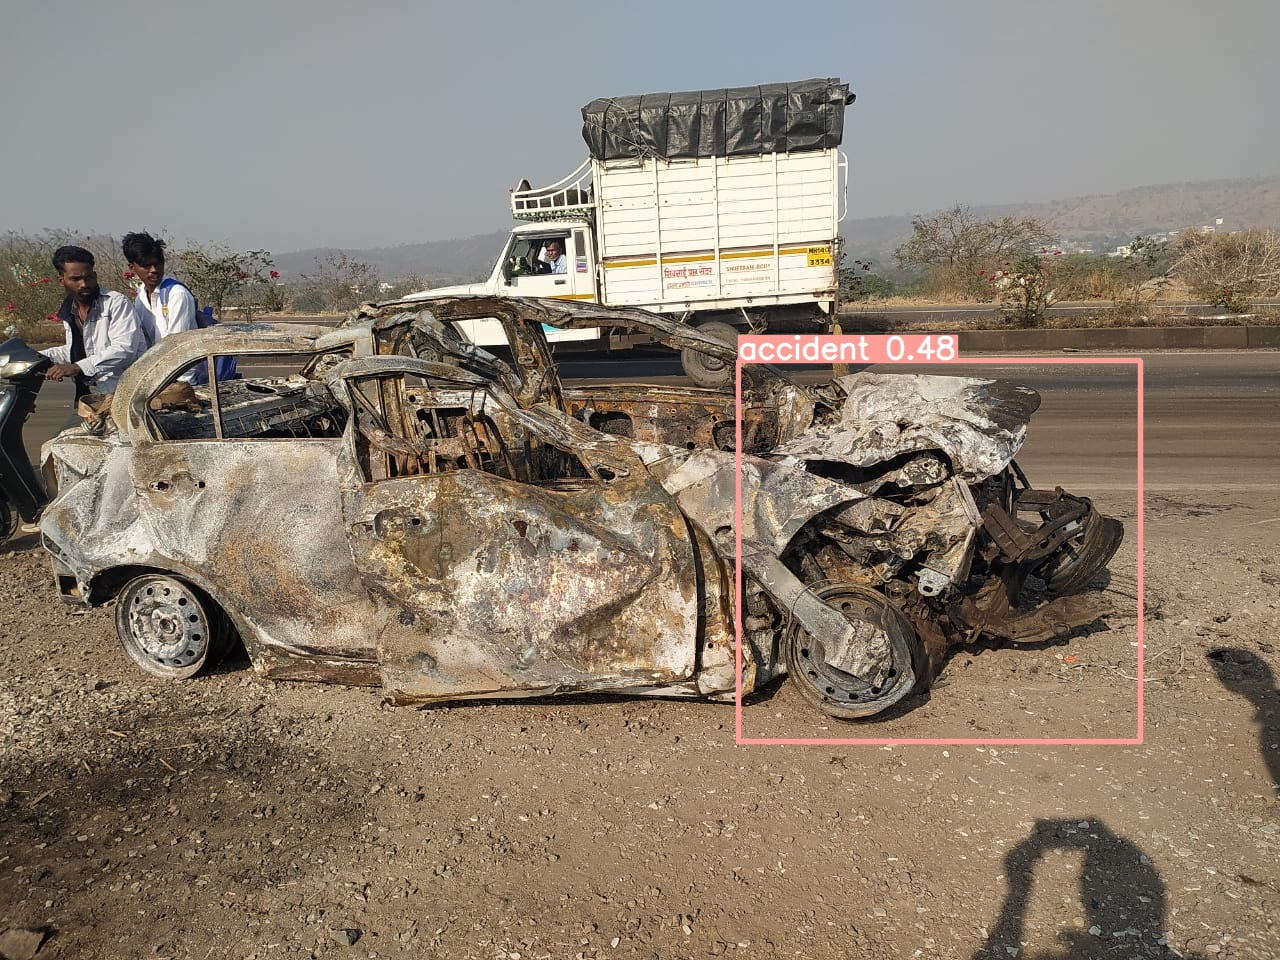

In [27]:
Image("/content/runs/detect/predict/WhatsApp_Image_2024_02_17_at_12_37_26_PM.jpeg")

In [28]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=https://img.freepik.com/premium-photo/asian-senior-man-falling-down-lying-floor-home-alone-with-wooden-walking-stick_143683-5757.jpg

/content
2024-05-16 18:17:42.692254: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-16 18:17:42.692315: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-16 18:17:42.694461: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-16 18:17:44.484751: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
100% 54.9k/54.9k [00:00<00:00, 233kB/s]
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 218 layers, 25841497 parameters, 0 gradients, 78.7 GFLOPs
WARNING ⚠️ NMS 

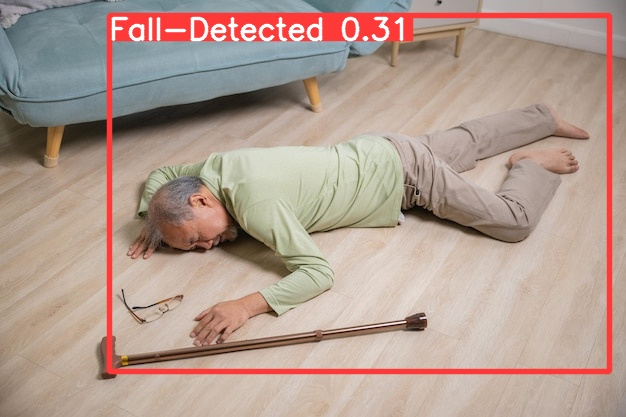

In [29]:
Image("/content/runs/detect/predict2/asian-senior-man-falling-down-lying-floor-home-alone-with-wooden-walking-stick_143683-5757.jpg")

In [41]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 hide_labels=True source=https://content.artofmanliness.com/uploads/2008/01/fight.jpg

/content
2024-05-16 18:31:56.778933: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-16 18:31:56.778988: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-16 18:31:56.780417: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-16 18:31:58.322150: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Found https://content.artofmanliness.com/uploads/2008/01/fight.jpg locally at fight.jpg
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 218 layers, 25841497 para

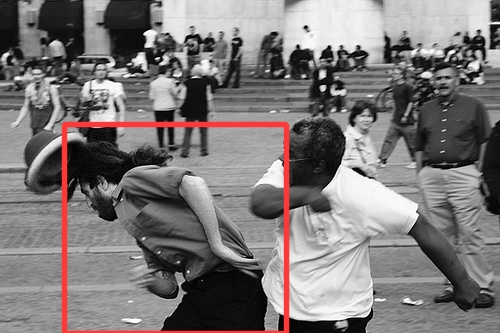

In [42]:
Image("/content/runs/detect/predict9/fight.jpg")